# Instance Segmentation with YOLO11

## Initialization
Inside **.venv/Scripts/activate** run: 
- pip install ultralytics

Link to model: https://docs.ultralytics.com/tasks/segment/
- I used **YOLO11m-seg**
- put it in /src

## Convert Annotations from JSON to YOLO & Split Into Train, Val, and Test Sets

Inside **.venv/Scripts/activate** run:

- pip install labelme2yolo
- labelme2yolo --json_dir </path/to/labelme_json_dir/> --val_size 0.15 --test_size 0.15 --output_format polygon --seed 42

*link to labelme2yolo: https://pypi.org/project/labelme2yolo/*

Also you need to **manually change** in the *(...)/YOLODataset/dataset.yaml* to the **correct path** *(which is the path to the folder (...)/YOLODataset)*, since the package doesn't do that for you

## Train Model

In [8]:
from ultralytics import YOLO
import torch

# Set memory usage to 8 GB on a 16 GB GPU (50%)
#torch.cuda.set_per_process_memory_fraction(0.5, device=torch.device('cuda:0'))
torch.cuda.empty_cache()


model = YOLO("../src/yolo11m-seg.pt")

model.train(data= "../data/YOLODataset300/dataset.yaml", imgsz = 640, device = 0, batch = 8, epochs = 10, workers = 1, lr0=0.001)

Ultralytics 8.3.38  Python-3.10.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)
engine\trainer: task=segment, mode=train, model=../src/yolo11m-seg.pt, data=../data/YOLODataset300/dataset.yaml, epochs=10, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=1, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

train: Scanning C:\Users\mikae\Desktop\TRA235\data\YOLODataset300\labels\train.cache... 210 images, 0 backgrounds, 0 corrupt: 100%|██████████| 210/210 [00:00<?, ?it/s]
val: Scanning C:\Users\mikae\Desktop\TRA235\data\YOLODataset300\labels\val.cache... 45 images, 0 backgrounds, 0 corrupt: 100%|██████████| 45/45 [00:00<?, ?it/s]


Plotting labels to c:\Users\mikae\Desktop\TRA235\runs\segment\train3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 115 weight(decay=0.0), 126 weight(decay=0.0005), 125 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 1 dataloader workers
Logging results to c:\Users\mikae\Desktop\TRA235\runs\segment\train3
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10      5.33G      1.923      3.533      3.878      1.858          4        640: 100%|██████████| 27/27 [00:08<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.17it/s]

                   all         45         87     0.0158      0.563     0.0144    0.00704     0.0159      0.563     0.0145    0.00799



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10      5.25G      1.567      1.855      2.812      1.655          5        640: 100%|██████████| 27/27 [00:07<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.99it/s]

                   all         45         87     0.0269      0.425     0.0171    0.00711     0.0276      0.437     0.0174    0.00815



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10      5.25G      1.554      1.568      1.763      1.639          4        640: 100%|██████████| 27/27 [00:07<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.96it/s]

                   all         45         87    0.00297      0.448    0.00219   0.000878    0.00242      0.345    0.00158   0.000597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10      5.22G        1.5       1.57      1.506      1.613          4        640: 100%|██████████| 27/27 [00:06<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.38it/s]

                   all         45         87     0.0223      0.575     0.0158    0.00883     0.0218      0.563     0.0151     0.0102



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10      5.26G      1.352      1.352       1.19      1.481          5        640: 100%|██████████| 27/27 [00:06<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.28it/s]

                   all         45         87     0.0987      0.563     0.0747      0.044      0.101      0.586     0.0758     0.0488



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10      5.26G      1.277      1.165       1.11      1.397          4        640: 100%|██████████| 27/27 [00:06<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.08it/s]

                   all         45         87       0.58      0.777      0.737      0.438      0.603      0.802      0.784      0.525



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10      5.26G       1.23      1.096      1.027      1.344          3        640: 100%|██████████| 27/27 [00:06<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.47it/s]

                   all         45         87      0.773      0.742      0.822      0.503      0.773      0.742      0.826      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10      5.26G      1.135      1.016     0.9266      1.266          3        640: 100%|██████████| 27/27 [00:06<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.43it/s]

                   all         45         87      0.813      0.851      0.882      0.566      0.813      0.851      0.882      0.631



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10      5.25G      1.054     0.9541     0.8568      1.241          4        640: 100%|██████████| 27/27 [00:06<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.26it/s]

                   all         45         87      0.841      0.792       0.87      0.629      0.866      0.815      0.894      0.659



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10       5.2G      1.021     0.9232     0.8338      1.232          3        640: 100%|██████████| 27/27 [00:06<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.39it/s]

                   all         45         87       0.87      0.843      0.906      0.663       0.87      0.843      0.907      0.708



10 epochs completed in 0.026 hours.
Optimizer stripped from c:\Users\mikae\Desktop\TRA235\runs\segment\train3\weights\last.pt, 45.1MB
Optimizer stripped from c:\Users\mikae\Desktop\TRA235\runs\segment\train3\weights\best.pt, 45.1MB

Validating c:\Users\mikae\Desktop\TRA235\runs\segment\train3\weights\best.pt...
Ultralytics 8.3.38  Python-3.10.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)
YOLO11m-seg summary (fused): 330 layers, 22,336,083 parameters, 0 gradients, 123.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.00it/s]


                   all         45         87       0.87      0.843      0.906      0.664       0.87      0.843      0.907      0.708
Speed: 1.3ms preprocess, 11.9ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to c:\Users\mikae\Desktop\TRA235\runs\segment\train3


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001C3B3ABA320>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.0410

## Predict with Model
https://docs.ultralytics.com/modes/predict/#inference-arguments


image 1/1 c:\Users\mikae\Desktop\TRA235\notebooks\..\data\YOLODataset300\images\test\D_Cit_02.jpeg: 640x640 2 windows, 17.0ms
Speed: 2.0ms preprocess, 17.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to c:\Users\mikae\Desktop\TRA235\runs\segment\predict11
1 label saved to c:\Users\mikae\Desktop\TRA235\runs\segment\predict11\labels


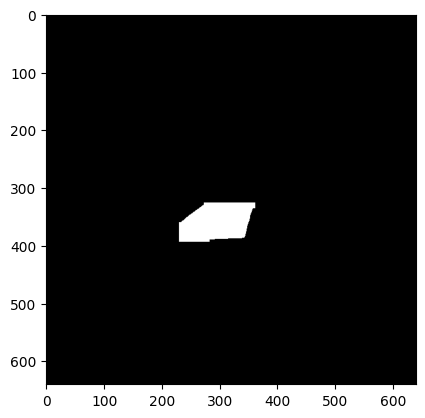

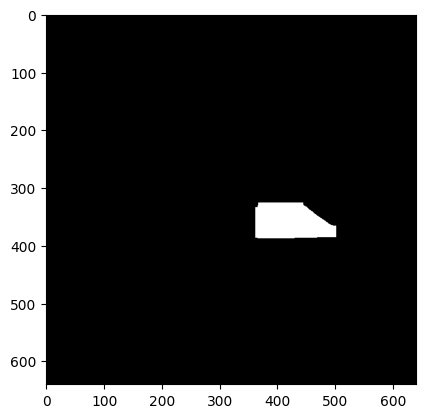

: 

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

model = YOLO("../runs/segment/train3/weights/best.pt") # Path to model

results = model.predict(
    source="../data/YOLODataset300/images/test/D_Cit_02.jpeg", 
    show=True, 
    save=True, 
    conf=0.7, 
    line_width=1, 
    save_crop=True, 
    save_txt=True, 
    show_boxes=True, 
    show_labels=True, 
    show_conf=True, 
    classes=[0],
    iou=0.5  
)

masks = results[0].masks.data  



# Display every window:
for mask in masks:
    mask_np = mask.cpu().numpy()
    plt.imshow(mask_np, cmap="gray")  
    plt.show()


